In [1]:
# First install some packages that will be needed
!pip install xgboost
!pip install tqdm

import numpy as np
import matplotlib.pyplot as plt

# makes printing more human-friendly
np.set_printoptions(precision=3, suppress=True)

from xgboost import XGBClassifier
import tqdm
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    with open('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', 'r') as f:
      data = np.genfromtxt(f,delimiter=',')
else:
    with open('winequality-red.csv', 'r') as f:
        data = np.genfromtxt(f,delimiter=',')

X = data[1:,:-1]
y = data[1:,-1]-3
print('num_samples, num_features', X.shape)
print('labels', np.unique(y))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
num_samples, num_features (1599, 11)
labels [0. 1. 2. 3. 4. 5.]


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('train', X_train.shape)
print('val', X_val.shape)
print('test', X_test.shape)

train (959, 11)
val (320, 11)
test (320, 11)


In [4]:
# Feature standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_val_standardized = scaler.transform(X_val)
X_test_standardized = scaler.transform(X_test)

In [5]:
# Fit model to training data
model_1tree = XGBClassifier(n_estimators=1)

model_1tree.fit(X_train_standardized, y_train)
y_pred = model_1tree.predict(X_test_standardized)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 55.00%


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]

[0.5875, 0.6, 0.609375, 0.615625, 0.621875, 0.628125, 0.65, 0.640625, 0.64375, 0.63125, 0.634375, 0.634375, 0.646875, 0.646875, 0.65, 0.646875, 0.65, 0.64375, 0.646875, 0.64375]

Highest Accuracy: 0.65


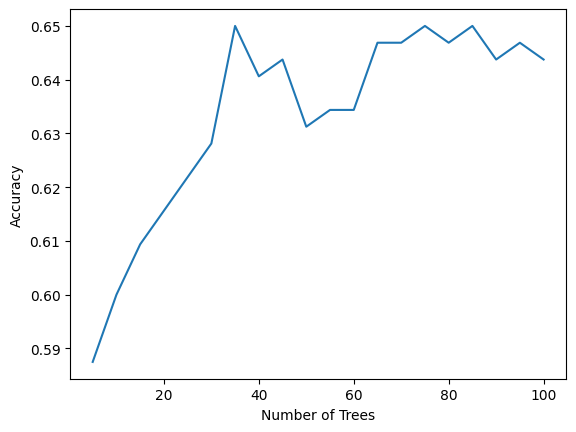

In [6]:
n_trees_list = range(5, 101, 5)
accuracies = []
for n_trees in tqdm.tqdm(n_trees_list):
    # Fit model to training data
    model_ntree = XGBClassifier(n_estimators=n_trees)
    # Make predictions for val data
    model_ntree.fit(X_train_standardized, y_train)
    y_pred = model_ntree.predict(X_test_standardized)

    predictions = [round(value) for value in y_pred]

    # Evaluate predictions
    acc = accuracy_score(y_test, predictions)

    accuracies.append(acc)

print(f'\nHighest Accuracy: {max(accuracies)}')
plt.plot(n_trees_list, accuracies)
plt.xlabel('Number of Trees');
plt.ylabel('Accuracy');

100%|██████████| 20/20 [00:12<00:00,  1.58it/s]


Highest Accuracy: 0.65625


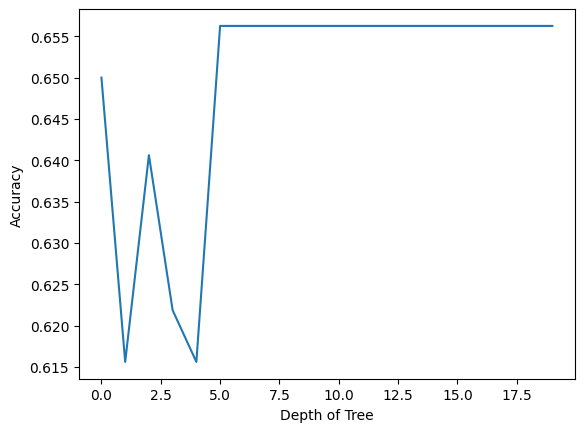

In [7]:
# Optimize another parameter
n_depth_list = range(0, 20, 1)
accuracies = []
for n_depth in tqdm.tqdm(n_trees_list):
    # Fit model to training data
    model_ndepth = XGBClassifier(n_estimators=n_trees, max_depth = n_depth)
    # Make predictions for val data
    model_ndepth.fit(X_train_standardized, y_train)
    y_pred = model_ndepth.predict(X_test_standardized)

    predictions = [round(value) for value in y_pred]

    # Evaluate predictions
    acc = accuracy_score(y_test, predictions)

    accuracies.append(acc)

print(f'\nHighest Accuracy: {max(accuracies)}')
plt.plot(n_depth_list, accuracies)
plt.xlabel('Depth of Tree');
plt.ylabel('Accuracy');

100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


Highest Accuracy: 0.65


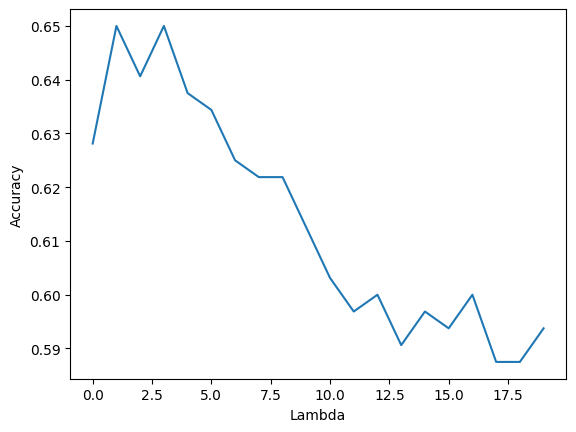

In [8]:
# Optimize another parameter
n_lambda_list = range(0, 20, 1)
accuracies = []
for n_lambda in tqdm.tqdm(n_trees_list):
    # Fit model to training data
    model_nlambda = XGBClassifier(n_estimators=n_trees, reg_lambda = n_lambda)
    # Make predictions for val data
    model_nlambda.fit(X_train_standardized, y_train)
    y_pred = model_nlambda.predict(X_test_standardized)

    predictions = [round(value) for value in y_pred]

    # Evaluate predictions
    acc = accuracy_score(y_test, predictions)

    accuracies.append(acc)

print(f'\nHighest Accuracy: {max(accuracies)}')
plt.plot(n_lambda_list, accuracies)
plt.xlabel('Lambda');
plt.ylabel('Accuracy');

In [11]:
# optimal config
n_trees=35
max_depth=5
reg_lambda=3

# Fit model to training data
model_optimal = XGBClassifier(n_estimators=n_trees, max_depth = max_depth, reg_lambda = reg_lambda)

model_optimal.fit(X_test_standardized, y_test)
y_pred = model_optimal.predict(X_test_standardized)

# Evaluate optimal config
acc = accuracy_score(y_test, predictions)
print(acc)

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


0.59375
Confusion Matrix:
[[  2   0   0   0   0   0]
 [  0  11   0   0   0   0]
 [  0   0 135   0   0   0]
 [  0   0   0 126   0   0]
 [  0   0   0   0  39   0]
 [  0   0   0   0   0   7]]
